/Users/wes/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


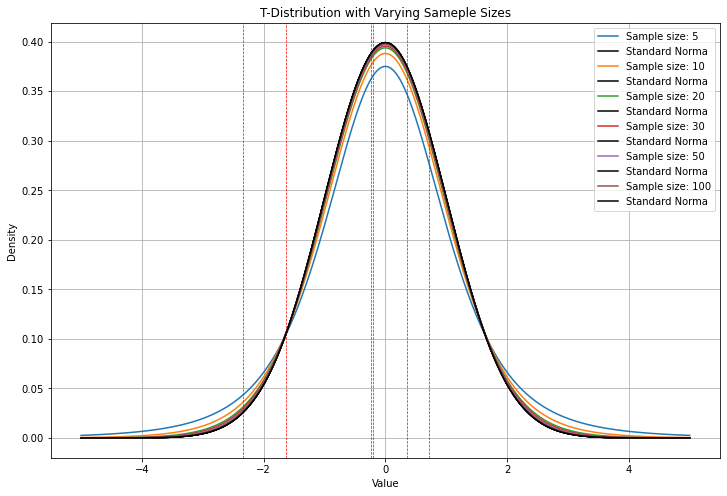

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t, norm

def generate_samples(sample_sizes):
    return [np.random.randn(size) for size in sample_sizes]

def compute_t_stats(sample_batches):
    means = [np.mean(samples) for samples in sample_batches]
    stds = [np.std(samples,ddof=1) for samples in sample_batches]
    sizes = [len(samples) for samples in sample_batches]
    
    t_stats = [means[i]/(stds[i] / np.sqrt(sizes[i])) for i in range(len(sample_batches))]
    return t_stats

def plt_t_stats(sample_batches, t_stats, sample_sizes):
    x = np.linspace(-5, 5, 1000)
    
    plt.figure(figsize=(12, 8))
    for i, size in  enumerate(sample_sizes):
        plt.plot(x, t.pdf(x, df=size-1), label=f'Sample size: {size}', linewidth=1.5)
        plt.axvline(t_stats[i], color='red', linestyle='--', linewidth=0.7)
        
        plt.plot(x, norm.pdf(x), color='black', label='Standard Norma', linestyle='-')
        plt.title('T-Distribution with Varying Sameple Sizes')
        plt.xlabel('Value')
        plt.ylabel('Density')
        plt.legend()
        plt.grid(True)
        plt.show

sample_sizes = [5, 10, 20, 30, 50, 100]
sample_batches = generate_samples(sample_sizes)
t_stats = compute_t_stats(sample_batches)
plt_t_stats(sample_batches, t_stats, sample_sizes)

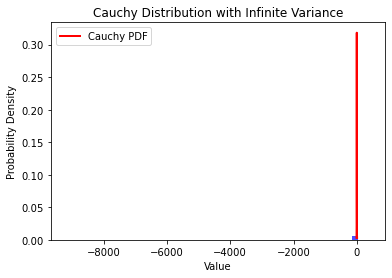

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import cauchy

# Parameters of the Cauchy distribution
x0 = 0  # Location parameter
gamma = 1  # Scale parameter

# Generate random samples from the Cauchy distribution
samples = cauchy.rvs(loc=x0, scale=gamma, size=1000)

# Plot the histogram
plt.hist(samples, bins=50, density=True, alpha=0.7, color='b')

# Plot the Cauchy probability density function
x = np.linspace(-10, 10, 1000)
pdf = cauchy.pdf(x, loc=x0, scale=gamma)
plt.plot(x, pdf, 'r-', lw=2, label='Cauchy PDF')

plt.title('Cauchy Distribution with Infinite Variance')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

In [5]:
import pandas as pd
import numpy as np

# Number of samples
n_samples = 1000

# Simulating engagement times before redesign
mean_pre = 300
std_dev_pre = 50
pre_redesign_times = np.random.normal(mean_pre, std_dev_pre, n_samples)

# Simulating engagement times after redesign
mean_post = 310
std_dev_post = 60
post_redesign_times = np.random.normal(mean_post, std_dev_post, n_samples)

# Save to CSV
df_pre = pd.DataFrame({'time': pre_redesign_times})
df_pre.to_csv('pre_redesign_times.csv', index=False)

df_post = pd.DataFrame({'time': post_redesign_times})
df_post.to_csv('post_redesign_times.csv', index=False)

print("Files 'pre_redesign_times.csv' and 'post_redesign_times.csv' created successfully!")

Files 'pre_redesign_times.csv' and 'post_redesign_times.csv' created successfully!


F-statistic: 0.6447918207973689
P-value: 0.9999999999975032
Do not reject the null hypothesis. There's no significant difference in variances.


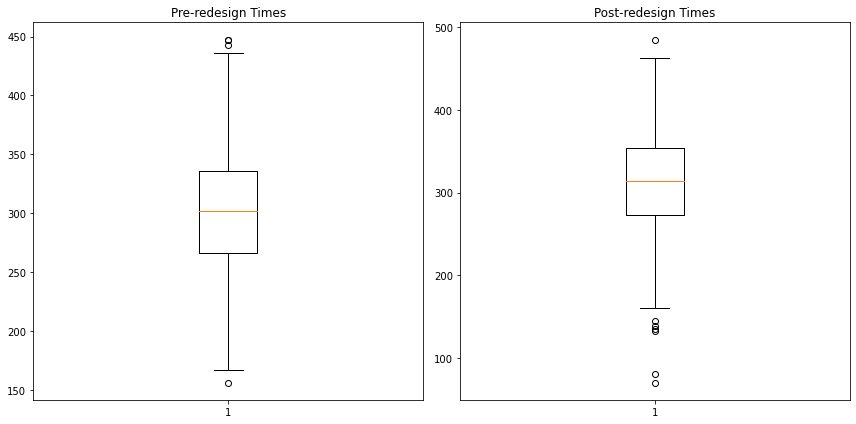

In [6]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

# Load data
pre_redesign = pd.read_csv('pre_redesign_times.csv')
post_redesign = pd.read_csv('post_redesign_times.csv')

# Compute the variances
var_pre = pre_redesign['time'].var()
var_post = post_redesign['time'].var()

# Compute the F-statistic
F = var_pre / var_post

# Degrees of freedom
df1 = len(pre_redesign) - 1
df2 = len(post_redesign) - 1

# Compute the p-value
p_value = 1 - stats.f.cdf(F, df1, df2)

# Decision based on 0.05 significance level
if p_value < 0.05:
    conclusion = "Reject the null hypothesis. There is a significant difference in variances."
else:
    conclusion = "Do not reject the null hypothesis. There's no significant difference in variances."

print(f"F-statistic: {F}")
print(f"P-value: {p_value}")
print(conclusion)

# Visualization
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.boxplot(pre_redesign['time'])
plt.title('Pre-redesign Times')

plt.subplot(1, 2, 2)
plt.boxplot(post_redesign['time'])
plt.title('Post-redesign Times')

plt.tight_layout()
plt.show()
